<a href="https://colab.research.google.com/github/mehrdadkazemi254/Nonlinear_Optimization/blob/main/Lec9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 3) Optimal Location of an Electricity Transformer

In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
points = np.array([[0,0],
                   [5,-1],
                   [4,6],
                   [1,3]])

d = lambda x: fsum([sqrt((x[0]-z[0])**2 + (x[1]-z[1])**2) for z in points])

Visualization of the objective function

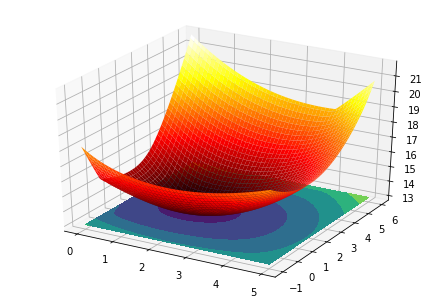

In [34]:
x = np.linspace(min(points[:,0]),max(points[:,0]),100)
y = np.linspace(min(points[:,1]),max(points[:,1]),100)
X, Y = np.meshgrid(x,y)
Z = np.zeros(np.shape(X))

for (i,j),_ in np.ndenumerate(Z):
  Z[i,j] = d([X[i,j], Y[i,j]])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z, cmap=plt.cm.hot)
ax.contourf(X,Y,Z,offset=13)

In [45]:
sol = minimize(d,[2,2])
print(sol)

      fun: 12.867956800420359
 hess_inv: array([[ 1.13360666, -0.55584127],
       [-0.55584127,  1.42137292]])
      jac: array([0.0000000e+00, 1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.59999997, 2.40000001])


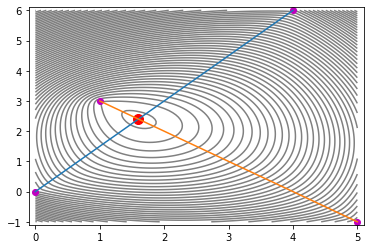

In [44]:
fig,ax = plt.subplots()
ax.contour(X,Y,Z, 80, colors='grey');
ax.plot(sol.x[0],sol.x[1],'ro',markersize=10);
ax.plot(points[:,0],points[:,1], 'mo')
ax.plot(points[[0,2],0],points[[0,2],1])
ax.plot(points[[1,3],0],points[[1,3],1])
ax.set_xlim(left=-0.1,right=5.1);
ax.set_ylim(bottom=-1-0.1,top=6+0.1);

Example 4) Optimal Location of a Rescue Helicopter

In [48]:
dmax = lambda x: max([sqrt((x[0]-z[0])**2 + (x[1]-z[1])**2) for z in points])
dmax([1,1]),d([1,1]) #compare the two distance functions

(5.830951894845301, 13.717301412217976)

In [52]:
sol = minimize(dmax, [0,0])
sol

      fun: 3.8243290594234485
 hess_inv: array([[0.00698793, 0.01785854],
       [0.01785854, 0.0709197 ]])
      jac: array([-0.24664569,  0.4706825 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 8
     njev: 169
   status: 2
  success: False
        x: array([3.05674573, 2.29382082])

In [53]:
sol = minimize(dmax, [0,0], method='Nelder-Mead') 
sol

 final_simplex: (array([[3.05878892, 2.29411051],
       [3.05886849, 2.29409662],
       [3.05883185, 2.29407847]]), array([3.82354484, 3.82355276, 3.82356533]))
           fun: 3.8235448439988327
       message: 'Optimization terminated successfully.'
          nfev: 192
           nit: 101
        status: 0
       success: True
             x: array([3.05878892, 2.29411051])

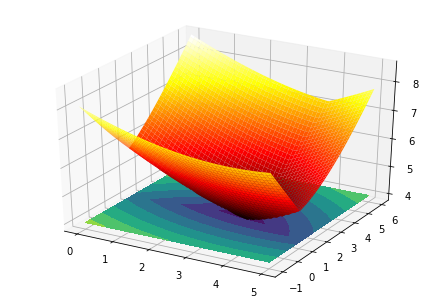

In [50]:
Zmax = np.zeros(np.shape(X))

for (i,j),_ in np.ndenumerate(Zmax):
  Zmax[i,j] = dmax([X[i,j], Y[i,j]])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Zmax, cmap=plt.cm.hot)
ax.contourf(X,Y,Zmax,offset=4)